#Week 3 - Fraud Detection


###Load necessary dependencies

In [0]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import pickle

###Import Kaggle dataset

In [0]:
os.environ['KAGGLE_USERNAME'] = 'blah'
os.environ['KAGGLE_KEY'] = 'blah'

In [5]:
!kaggle competitions download -c ieee-fraud-detection

 93% 49.0M/52.5M [00:00<00:00, 45.2MB/s]
100% 52.5M/52.5M [00:00<00:00, 63.3MB/s]
  0% 0.00/3.02M [00:00<?, ?B/s]
100% 3.02M/3.02M [00:00<00:00, 99.7MB/s]
 95% 45.0M/47.3M [00:00<00:00, 40.1MB/s]
100% 47.3M/47.3M [00:00<00:00, 74.5MB/s]
  0% 0.00/2.97M [00:00<?, ?B/s]
100% 2.97M/2.97M [00:00<00:00, 97.5MB/s]
  0% 0.00/1.14M [00:00<?, ?B/s]
100% 1.14M/1.14M [00:00<00:00, 157MB/s]


In [6]:
!unzip train_identity.csv.zip
!unzip train_transaction.csv.zip
!unzip test_identity.csv.zip
!unzip test_transaction.csv.zip

Archive:  train_identity.csv.zip
  inflating: train_identity.csv      
Archive:  train_transaction.csv.zip
  inflating: train_transaction.csv   
Archive:  test_identity.csv.zip
  inflating: test_identity.csv       
Archive:  test_transaction.csv.zip
  inflating: test_transaction.csv    


###Load the dataset into dataframes and clean data

In [0]:
training_transactions = pd.read_csv('./train_transaction.csv')
testing_transactions = pd.read_csv('./test_transaction.csv')

In [8]:
train_transaction_new = pd.DataFrame(training_transactions, columns=training_transactions.isnull().sum().sort_values()[:196].index)
train_transaction_new = train_transaction_new.drop(columns=['TransactionID', 'TransactionDT', 'card6', 'card4', 'P_emaildomain'])
train_transaction_new_label = train_transaction_new.isFraud
train_transaction_new = train_transaction_new.drop(columns=['isFraud'])
train_transaction_new.head()

,C14,C13,C12,C11,C10,C9,C8,C7,C6,C5,C4,C3,C2,C1,TransactionAmt,ProductCD,card1,V309,V306,V307,V299,V321,V320,V319,V318,V316,V312,V311,V305,V308,V310,V304,V317,V302,V303,V298,V297,V295,V294,V292,...,V71,V72,V74,V64,V73,D15,V94,V75,V76,V77,V78,V79,V80,V81,V83,V82,V86,V87,V88,V89,V90,V91,V92,V93,V84,V85,D4,V40,V41,V38,V52,V39,V37,V49,V48,V51,V46,V45,V47,V43
0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,68.5,W,13926,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,29.0,W,2755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,59.0,W,4663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,315.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,2.0,50.0,W,18132,0.0,50.0,1758.0,0.0,0.0,0.0,0.0,790.0,50.0,135.0,0.0,1.0,925.0,354.0,0.0,1404.0,0.0,0.0,0.0,0.0,24.0,38.0,1.0,...,0.0,0.0,0.0,0.0,0.0,111.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,50.0,H,4497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###Create a visual of our data per the live Q&A

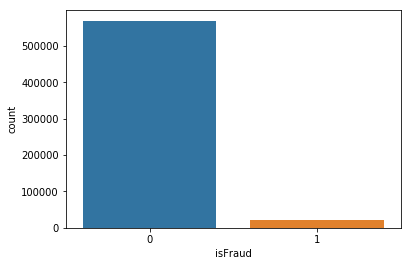

In [10]:
sns.countplot(x='isFraud', data=training_transactions)

In [11]:

test_transaction_new = pd.DataFrame(testing_transactions, columns=training_transactions.isnull().sum().sort_values()[:196].index)
test_transaction_new = test_transaction_new.drop(columns=['isFraud', 'TransactionID', 'TransactionDT', 'card6', 'card4', 'P_emaildomain'])
test_transaction_new.head()

,C14,C13,C12,C11,C10,C9,C8,C7,C6,C5,C4,C3,C2,C1,TransactionAmt,ProductCD,card1,V309,V306,V307,V299,V321,V320,V319,V318,V316,V312,V311,V305,V308,V310,V304,V317,V302,V303,V298,V297,V295,V294,V292,...,V71,V72,V74,V64,V73,D15,V94,V75,V76,V77,V78,V79,V80,V81,V83,V82,V86,V87,V88,V89,V90,V91,V92,V93,V84,V85,D4,V40,V41,V38,V52,V39,V37,V49,V48,V51,V46,V45,V47,V43
0,6.0,115.0,1.0,5.0,0.0,6.0,0.0,0.0,4.0,3.0,0.0,0.0,6.0,6.0,31.95,W,10409,0.000000,0.000000,47.950001,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.000000,47.950001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,409.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,398.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1,2.0,12.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,49.00,W,4272,0.000000,0.000000,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,77.000000,0.000000,1.0,77.000000,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,634.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,634.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,2.0,22.0,0.0,2.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,2.0,171.00,W,4476,0.000000,0.000000,1321.000000,0.0,0.0,263.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.000000,1058.000000,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,97.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,4.0,7.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,5.0,284.95,W,10989,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,242.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,242.0,0.0,1.0,2.0,0.0,0.0,2.0,1.0,1.0,0.0,2.0,2.0,2.0,0.0
4,6.0,14.0,0.0,6.0,0.0,5.0,0.0,0.0,5.0,2.0,0.0,0.0,6.0,6.0,67.95,W,18018,67.949997,67.949997,183.850006,0.0,0.0,0.0,0.0,0.0,0.0,67.949997,67.949997,1.0,67.949997,183.850006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,22.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,22.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0


###Use Sklearn LabelEncoder to change text to int

In [13]:
labelencoder = LabelEncoder()
train_transaction_new['ProductCD'] = labelencoder.fit_transform(train_transaction_new['ProductCD'])
train_transaction_new.ProductCD[:5]

0    4
1    4
2    4
3    4
4    1
Name: ProductCD, dtype: int64

In [14]:
test_transaction_new['ProductCD'] = labelencoder.fit_transform(test_transaction_new['ProductCD'])
test_transaction_new.ProductCD[:5]

0    4
1    4
2    4
3    4
4    4
Name: ProductCD, dtype: int64

In [0]:
train_transaction_new = train_transaction_new.fillna(-9999)
test_transaction_new = test_transaction_new.fillna(-9999)

###Split our data for training and testing (80/20 split)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(train_transaction_new, train_transaction_new_label, test_size=0.2)

###Create our model and train it

In [17]:
lr = LogisticRegression(C=0.09, class_weight='balanced')
lr = lr.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


###Test our accuracy

In [18]:
y_predict = lr.predict(x_test)
accuracy_score(y_predict, y_test)

0.7297473498831578

###Save our model for future usage in our web app

In [0]:
filename='fraud_model.pkl'
pickle.dump(lr, open(filename, 'wb'))

###Create my submission file for the competition

In [24]:
predictions = lr.predict_proba(test_transaction_new)

csv_data = [['TransactionID', 'isFraud']]

fraud_dict = { 'fraud': 0, 'not_fraud': 0 }
for i in range(0, len(predictions)):
  csv_data.append([testing_transactions['TransactionID'][i], predictions[i][0]])
  if predictions[i][0] >= 0.5:
    fraud_dict['fraud'] += 1
  else:
    fraud_dict['not_fraud'] += 1
print(fraud_dict)

with open('submission.csv', 'w') as csv_file:
  writer = csv.writer(csv_file)
  writer.writerows(csv_data)

csv_file.close()

{'fraud': 399672, 'not_fraud': 107019}


###Confirm both the pickle and submission file were saved

In [25]:
!ls

fraud_model.pkl		   test_identity.csv	     train_identity.csv
sample_data		   test_identity.csv.zip     train_identity.csv.zip
sample_submission.csv.zip  test_transaction.csv      train_transaction.csv
submission.csv		   test_transaction.csv.zip  train_transaction.csv.zip
